In [1]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
names = ['MLE', 'GeoMLE', 'MIND', 'DANCo', 'ESS', 'PCA']

In [3]:
cmap = {'DANCo':'darkorange',
        'ESS': 'sienna',
        'MIND': 'forestgreen',
        'MIND_ML': 'forestgreen',
        'MLE': 'indianred',
        'PCA': 'mediumpurple',
        'GeoMLE': 'steelblue'}

In [4]:
font = {'family' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

### Decribe algorithm

In [5]:
data = np.load('exp.npy')

In [6]:
from sklearn.linear_model import Ridge

/home/mokrov/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


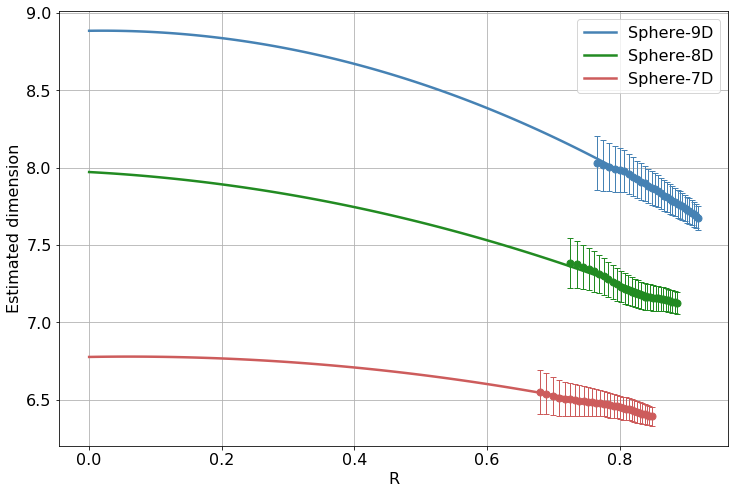

In [7]:
alpha_poly = [1] + [2]*100
alpha_reg = 1e-2

cm = ['indianred', 'forestgreen', 'steelblue'][::-1]

f, ax = plt.subplots(1, 1, figsize=(12, 8))

podgon = [1.8, 1.4, 1.4]

for i, (x, y, w) in enumerate(data[::-1]):
    
    X = np.array([x ** i for i in alpha_poly]).T
    xlin = np.linspace(0, x.max(), 100)
    Xlin = np.array([xlin ** i for i in alpha_poly]).T
    lm = Ridge(alpha=alpha_reg)
    lm.fit(X, y, w**-1)
    plt.errorbar(x, y, w * 0.4 , fmt='o', color=cm[i], capsize=3, markersize=7, capthick=1, linewidth=1)
    plt.plot(xlin, lm.predict(Xlin), color=cm[i], linewidth=2.5, label='Sphere-{}D'.format(9 - i))


ax.set_title('')
ax.set_ylabel(r'Estimated dimension')
ax.set_xlabel(r'R')
ax.legend()
ax.grid()

plt.savefig('Explain.eps')

### Dolan-More

In [8]:
df = pd.read_csv('table_final.csv')

In [9]:
df.groupby(['Dataset', 'Num', 'Dim', 'RealDim']).mean()

MLE     GeoMLE  MIND  DANCo  \
Dataset        Num    Dim   RealDim                                      
Affine         1000.0 5.0   5.0       4.481598   5.000000   5.0    5.0   
                      10.0  10.0      7.966572   9.873106   8.0    9.8   
                      20.0  20.0     14.137147  19.358731  14.5   19.5   
Affine_3to5    1000.0 5.0   3.0       2.821012   3.116463   3.0    3.0   
Cubic          1000.0 5.0   3.0       3.057692   2.999848   3.0    3.0   
                      35.0  30.0     19.599956  29.601043  20.4   30.6   
                      100.0 70.0     34.226586  74.231995  35.9   73.3   
Helicoid       1000.0 3.0   2.0       2.088830   2.123218   2.0    2.0   
                      13.0  2.0       2.099319   2.160699   2.0    2.0   
Helix1d        1000.0 3.0   1.0       1.000433   1.282753   1.0    1.0   
                      13.0  1.0       1.000088   1.439428   1.0    1.0   
Helix2d        1000.0 3.0   2.0       2.746658   2.425806   3.0    3.0   
                      13.0  2.0       2.726436   2.356519   3.0    3.0   
Moebius        1000.0 3.0   2.0       1.985670   1.674933   2.0    2.0   
Nonlinear      1000.0 8.0   4.0       4.078115   3.286912   4.0    5.7   
                      36.0  6.0       6.653324   6.464335   6.0    8.1   
                      64.0  8.0       9.184100  10.488520   9.0   10.1   
                      72.0  12.0     13.470347  17.499133  13.5   17.3   
Nonlinear_4to6 1000.0 6.0   4.0       3.808056   4.005481   4.0    5.0   
Norm           1000.0 20.0  20.0     15.014042  20.000000  15.8   19.9   
                      50.0  20.0     15.007304  21.768923  15.7   21.3   
                            50.0     27.111607  50.000000  28.7   48.2   
                      70.0  50.0     27.076643  53.015520  28.8   50.9   
Paraboloid     1000.0 12.0  3.0       2.824728   2.943978   3.0    3.0   
                      21.0  6.0       4.725195   5.787580   5.0    6.8   
                      30.0  9.0       5.923057   8.930670   6.0    8.0   
                      39.0  12.0      6.668408  11.993854   7.0    8.5   
                      48.0  15.0      7.038418  14.008592   7.8    8.9   
Roll           1000.0 3.0   2.0       1.942687   2.561472   2.0    2.0   
                      13.0  2.0       1.942688   2.688780   2.0    2.0   
Sphere         1000.0 5.0   3.0       2.986449   2.993130   3.0    3.0   
                      10.0  5.0       4.871473   5.013038   5.0    6.0   
                      15.0  10.0      8.839862   9.872874   9.0   11.0   
                      35.0  30.0     20.534097  31.023527  21.2   30.7   
                      55.0  50.0     28.688342  50.401796  30.0   49.9   
                      75.0  70.0     36.040805  71.312107  37.8   70.3   
Spiral         1000.0 3.0   1.0       1.748739   1.431872   1.0    1.0   
                      13.0  1.0       1.758266   1.448036   1.0    1.0   
Uniform        1000.0 10.0  5.0       4.477023   4.676076   4.8    5.0   
                      15.0  10.0      8.057817   8.920724   8.1   10.0   
                      35.0  30.0     19.004942  28.550586  19.8   29.8   
                      55.0  50.0     27.420953  51.035633  29.1   51.9   
                      75.0  70.0     33.944176  73.077515  35.7   71.2   

                                           ESS   PCA  
Dataset        Num    Dim   RealDim                   
Affine         1000.0 5.0   5.0       4.982457   5.0  
                      10.0  10.0     10.034172  10.0  
                      20.0  20.0     19.872978  20.0  
Affine_3to5    1000.0 5.0   3.0       2.622868   3.0  
Cubic          1000.0 5.0   3.0       4.001700   4.0  
                      35.0  30.0     31.204025  31.0  
                      100.0 70.0     71.131592  71.0  
Helicoid       1000.0 3.0   2.0       1.831271   2.0  
                      13.0  2.0       1.827817   2.0  
Helix1d        1000.0 3.0   1.0       2.634219   3.0  
                      13.0  1.0       2.616175   3.0

In [10]:
df_int = df.copy()
df_int = df_int.round()

errors = df_int[names].sub(df_int['RealDim'], axis=0).values

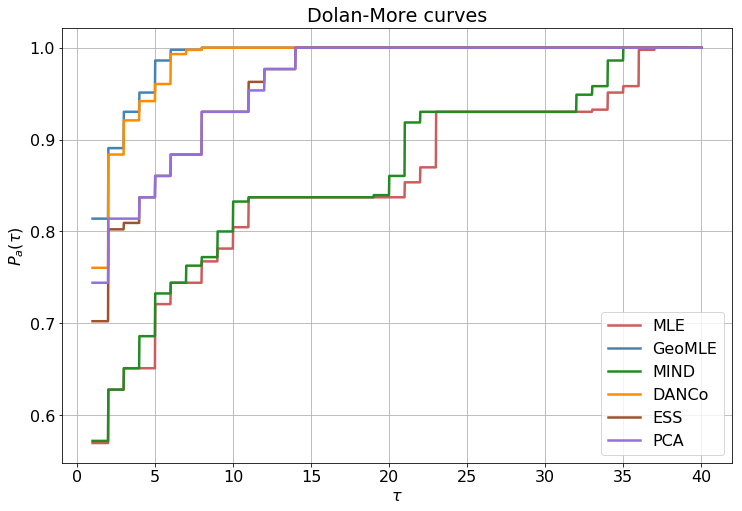

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
nsteps = 2001
max_tau = 40
errors_total = abs(errors)
errors_total = np.max([errors_total, np.ones_like(errors_total)], axis=0)


taus = np.linspace(1, max_tau, nsteps)        
rhos = np.zeros((nsteps, len(names)))
for cnt, tau in enumerate(taus):
    rhos[cnt] = np.sum(errors_total <= tau, axis=0)

for i, name in enumerate(names):
    ax.plot(taus, rhos[:,i]/errors_total.shape[0], linewidth=2.5, c = cmap[name], label=name)

ax.set_title('Dolan-More curves')
ax.set_ylabel(r'$P_a(\tau)$')
ax.set_xlabel(r'$\tau$')
ax.legend()
ax.grid()

# plt.savefig('DMcurve.eps')

### Dependancy

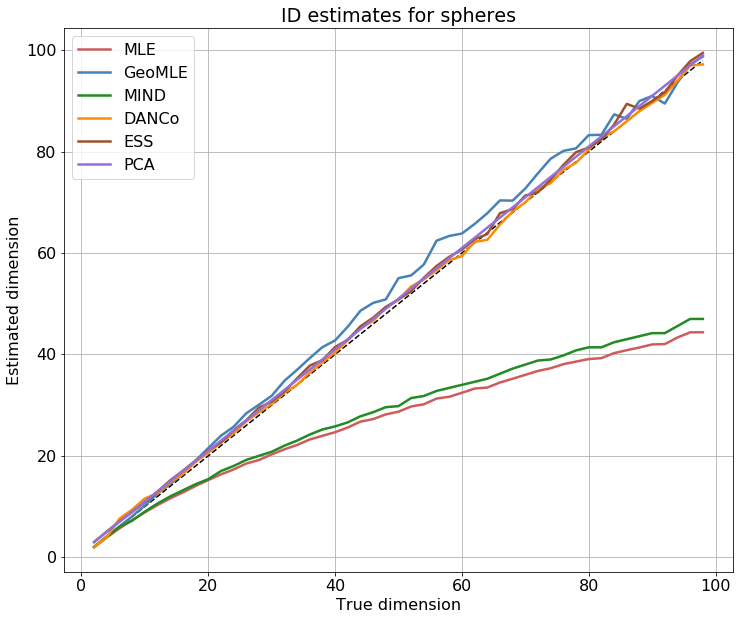

In [12]:
file = 'sphere_final'
df = pd.read_csv(file + '.csv')
f, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.plot(df['real'].values, df['real'].values, 'k--')
for name in names:
    ax.plot(df['real'], df[name], label=name, linewidth=2.5, c=cmap[name])
    
ax.grid()
ax.legend()
ax.set_title(r'ID estimates for spheres')
ax.set_xlabel(r'True dimension')
ax.set_ylabel(r'Estimated dimension')
plt.savefig('Sphere.eps')

### Noise

In [98]:
noise_step = [0, 0.01, 0.02, 0.03, 0.04, 0.05]

MPE = {'MLE':    [0.2505, 0.2458, 0.2855, 0.2881, 0.3214, 0.3664],
       'GeoMLE': [0.0830, 0.1038, 0.1259, 0.1498, 0.2051, 0.2695],
       'MIND':   [0.1869, 0.2058, 0.2645, 0.2930, 0.3508, 0.4213],
       'DANCo':  [0.1038, 0.1460, 0.2314, 0.3439, 0.4234, 0.4791],
       'ESS':    [0.3989, 0.4007, 0.4015, 0.4031, 0.4048, 0.4042],
       'PCA':    [0.4203, 0.4203, 0.4203, 0.4214, 0.4237, 0.4281]}

In [20]:
df = pd.read_csv('noise.csv')

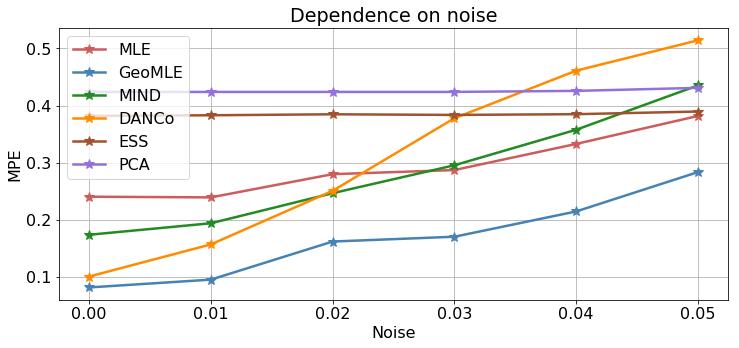

In [21]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))

for name in names:
    ax.plot(df['noise'], df[name], '-*', ms=10, label=name, c=cmap[name], linewidth=2.5,)

ax.grid()
ax.legend(loc=2)
ax.set_title(r'Dependence on noise')
ax.set_xlabel(r'Noise')
ax.set_ylabel(r'MPE')

plt.savefig('Noise.eps')

## Dependance of N

In [22]:
df = pd.read_csv('n_steps.csv')

Text(0, 0.5, 'MPE')

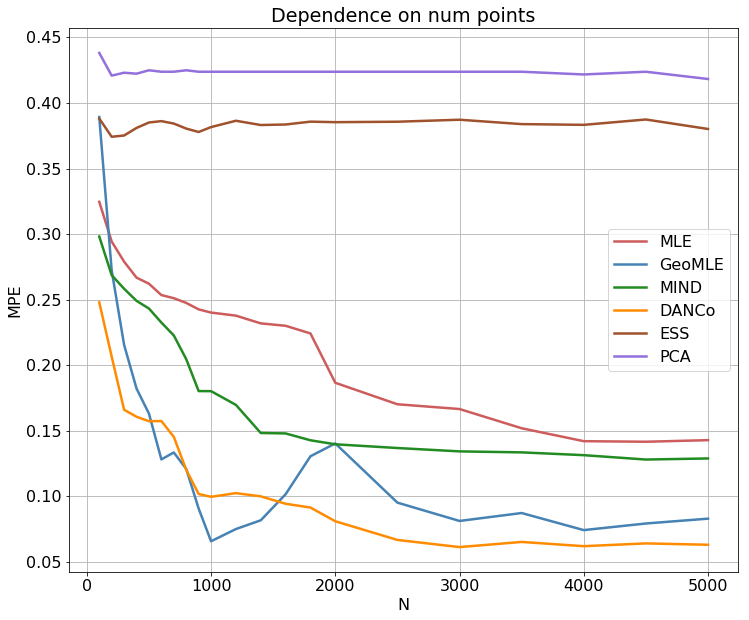

In [23]:
f, ax = plt.subplots(1, 1, figsize=(12, 10))

for name in names:
    ax.plot(df['N'], df[name], label=name, c=cmap[name], linewidth=2.5,)

ax.grid()
ax.legend()
ax.set_title(r'Dependence on num points')
ax.set_xlabel(r'N')
ax.set_ylabel(r'MPE')

# plt.savefig('Nsteps.eps')